# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import math
#!pip install xgboost
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, learning_curve
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# Load Data

In [2]:
df = pd.read_csv('online_store_customer_data.csv')
print('Online store customer data df shape:', df.shape)
df.head(10)

Online store customer data df shape: (2512, 11)


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
5,1/3/2019,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
6,1/3/2019,151206,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42
7,1/3/2019,151207,Male,37.0,Married,Connecticut,Basic,workers,PayPal,1.0,1149.55
8,1/4/2019,151208,Male,75.0,Married,Florida,Silver,Employees,Card,0.0,1046.20
9,1/4/2019,151209,Female,41.0,Married,Vermont,Gold,Unemployment,Card,1.0,2730.60


In [3]:
#Backup dataset
df1 = df.copy()

In [4]:
df.shape

(2512, 11)

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [6]:
df['Segment'].value_counts()

Basic       1136
Silver       490
Platinum     443
Gold         247
Missing      196
Name: Segment, dtype: int64

In [7]:
df.columns

Index(['Transaction_date', 'Transaction_ID', 'Gender', 'Age', 'Marital_status',
       'State_names', 'Segment', 'Employees_status', 'Payment_method',
       'Referal', 'Amount_spent'],
      dtype='object')

In [8]:
# Checking Missing Value based on distinct unique data
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Transaction_date =================


8/29/2020     12
3/8/2021      11
2/8/2019      10
10/1/2019      9
7/17/2019      9
10/24/2020     8
4/21/2019      8
10/16/2019     8
8/14/2019      8
5/12/2019      8
3/29/2019      7
1/9/2020       7
9/25/2019      7
9/6/2020       7
1/6/2020       7
8/18/2020      7
8/17/2020      7
2/16/2020      7
7/27/2020      7
11/21/2019     7
10/12/2019     7
6/25/2020      7
10/29/2019     7
5/28/2019      7
1/25/2020      7
7/14/2020      7
6/5/2019       7
8/8/2019       7
6/24/2019      7
12/8/2020      7
12/4/2019      6
7/23/2019      6
5/25/2020      6
5/13/2020      6
4/17/2019      6
4/29/2020      6
3/15/2021      6
3/24/2020      6
11/24/2019     6
3/21/2019      6
4/11/2019      6
8/8/2020       6
3/25/2021      6
12/8/2019      6
1/30/2020      6
6/7/2019       6
5/24/2019      6
1/19/2020      6
1/13/2020      6
1/10/2020      6
4/19/2021      6
8/7/2020       6
1/1/2020       6
8/12/2020      6
2/21/2019      6
11/8/2020      6
2/6/2019       6
12/10/2020     6
9/8/2019      


============= Transaction_ID =================


151299    2
151297    2
151261    2
151262    2
151263    2
151303    2
151302    2
151301    2
151300    2
151259    2
151298    2
151260    2
152869    1
152870    1
152871    1
152872    1
152873    1
152874    1
152868    1
152867    1
152866    1
152865    1
152864    1
152875    1
152876    1
152877    1
151200    1
152862    1
152863    1
152848    1
152861    1
152860    1
152859    1
152858    1
152857    1
152856    1
152855    1
152854    1
152853    1
152852    1
152851    1
152850    1
152878    1
152879    1
152880    1
152911    1
152903    1
152904    1
152905    1
152906    1
152907    1
152908    1
152909    1
152910    1
152912    1
152881    1
152913    1
152914    1
152915    1
152916    1
152917    1
152918    1
152919    1
152920    1
152902    1
152901    1
152900    1
152899    1
152882    1
152883    1
152884    1
152885    1
152886    1
152887    1
152888    1
152889    1
152890    1
152891    1
152892    1
152893    1
152894    1
152895    1
152896    1
1528


============= Gender =================


Female    1356
Male      1128
Name: Gender, dtype: int64


============= Age =================


54.0    51
43.0    50
55.0    48
24.0    47
53.0    46
16.0    46
42.0    45
72.0    45
40.0    45
51.0    45
75.0    45
18.0    45
47.0    44
37.0    44
34.0    44
71.0    44
78.0    44
50.0    44
28.0    43
49.0    43
62.0    43
48.0    43
30.0    43
46.0    42
39.0    42
26.0    42
70.0    41
25.0    41
63.0    41
21.0    40
32.0    40
56.0    40
76.0    39
27.0    39
15.0    39
59.0    38
65.0    38
33.0    38
35.0    38
67.0    38
41.0    38
44.0    38
64.0    37
60.0    37
73.0    36
22.0    36
68.0    36
77.0    36
66.0    36
45.0    35
36.0    35
31.0    35
38.0    34
17.0    34
61.0    34
20.0    34
57.0    33
19.0    33
52.0    31
58.0    28
69.0    22
74.0    21
29.0    18
Name: Age, dtype: int64


============= Marital_status =================


Married    1473
Single     1039
Name: Marital_status, dtype: int64


============= State_names =================


Illinois          67
Georgia           64
Massachusetts     63
Maine             62
Kentucky          59
Minnesota         59
Missouri          57
Arizona           56
Delaware          56
Arkansas          55
Nevada            55
New York          55
California        55
New Mexico        55
Vermont           54
West Virginia     54
New Jersey        53
Oregon            53
Florida           53
Connecticut       52
Washington        52
Pennsylvania      52
Colorado          52
South Dakota      52
Michigan          52
Iowa              51
Rhode Island      51
Louisiana         49
Texas             49
Montana           48
North Carolina    46
Virginia          46
Hawaii            46
Wisconsin         45
Idaho             45
Maryland          45
South Carolina    45
Wyoming           44
Mississippi       44
Oklahoma          44
Utah              43
New Hampshire     43
Indiana           43
Ohio              43
Alabama           42
Alaska            41
Nebraska          41
North Dakota 


============= Segment =================


Basic       1136
Silver       490
Platinum     443
Gold         247
Missing      196
Name: Segment, dtype: int64


============= Employees_status =================


Employees        946
workers          798
self-employed    487
Unemployment     255
Name: Employees_status, dtype: int64


============= Payment_method =================


PayPal    1168
Card       749
Other      595
Name: Payment_method, dtype: int64


============= Referal =================


1.0    1537
0.0     820
Name: Referal, dtype: int64


============= Amount_spent =================


1264.73    2
61.35      2
1277.64    2
1397.09    2
1938.48    2
1488.16    2
2403.94    2
790.10     2
388.15     2
1218.56    2
515.77     2
1902.46    2
1049.48    2
685.49     2
1888.69    2
2560.26    2
929.89     2
433.20     2
2457.09    2
1594.05    2
2051.36    1
193.47     1
1399.66    1
2712.34    1
1912.21    1
1809.51    1
1480.73    1
1757.22    1
830.35     1
432.25     1
400.75     1
1763.31    1
1285.09    1
932.80     1
2892.37    1
2778.69    1
1076.42    1
2463.71    1
2777.64    1
2977.78    1
1713.06    1
1257.05    1
81.60      1
1813.83    1
2807.19    1
477.56     1
909.76     1
757.25     1
691.88     1
1086.39    1
1281.02    1
2837.11    1
956.47     1
1169.07    1
2488.07    1
684.07     1
2502.40    1
2450.77    1
1596.82    1
1738.33    1
2716.49    1
1399.42    1
865.54     1
2447.15    1
1025.38    1
1613.70    1
1258.21    1
2498.29    1
575.15     1
1399.61    1
1572.17    1
1622.68    1
2620.07    1
1083.79    1
2047.83    1
1858.94    1
1194.36    1

In [9]:
# df = df[df['romantic','internet','higher','nursery','activities','paid','famsup','schoolsup','guardian','reason','Fjob','Mjob','Pstatus','famsize','address','sex','school']].astype(str)
# df.info()

In [10]:
#Drop Duplicated
df.duplicated().sum()

12

In [11]:
# Drop Duplicates

print(f"Dataframe dimension before duplication drop {df.shape[0]}")

df = df.drop_duplicates().reset_index(drop=True)

print(f"Dataframe dimension after duplication drop {df.shape[0]}")

Dataframe dimension before duplication drop 2512
Dataframe dimension after duplication drop 2500


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2500 non-null   object 
 1   Transaction_ID    2500 non-null   int64  
 2   Gender            2472 non-null   object 
 3   Age               2458 non-null   float64
 4   Marital_status    2500 non-null   object 
 5   State_names       2500 non-null   object 
 6   Segment           2500 non-null   object 
 7   Employees_status  2474 non-null   object 
 8   Payment_method    2500 non-null   object 
 9   Referal           2346 non-null   float64
 10  Amount_spent      2259 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 215.0+ KB


In [13]:
df.isna().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             154
Amount_spent        241
dtype: int64

In [14]:
#Handling Missing Value
df.dropna(subset=['Amount_spent'], inplace=True)
df.dropna(subset=['Gender'], inplace=True)
df.dropna(subset=['Age'], inplace=True)
df.dropna(subset=['Employees_status'], inplace=True)
df.dropna(subset=['Referal'], inplace=True)

In [15]:
df.isna().sum()

Transaction_date    0
Transaction_ID      0
Gender              0
Age                 0
Marital_status      0
State_names         0
Segment             0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
dtype: int64

In [16]:
# Mode imputation on Segment column

mode_segment = df[~df['Segment'].isin(['Missing'])]['Segment'].mode()[0]
#proses imputasi nilai
df['Segment'] = df['Segment'].apply(lambda x: mode_segment if x in ['Missing'] else x)

In [17]:
mode_segment

'Basic'

In [18]:
# Checking Missing Value based on distinct unique data
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Transaction_date =================


3/8/2021      10
8/29/2020      9
4/21/2019      8
10/1/2019      8
10/12/2019     7
12/8/2020      7
9/25/2019      7
7/27/2020      7
6/5/2019       7
10/24/2020     7
7/17/2019      7
1/30/2020      6
1/25/2020      6
9/9/2020       6
2/21/2019      6
1/19/2020      6
11/8/2020      6
2/16/2020      6
1/6/2020       6
3/29/2019      6
1/1/2020       6
1/4/2021       6
12/4/2019      6
9/6/2020       6
11/21/2019     6
5/24/2019      6
6/7/2019       6
3/15/2021      6
8/8/2019       6
8/17/2020      6
8/18/2020      6
10/16/2019     6
3/24/2020      6
5/7/2020       5
5/25/2020      5
5/19/2020      5
5/13/2020      5
3/21/2019      5
5/30/2020      5
6/21/2019      5
6/25/2020      5
7/4/2020       5
3/31/2020      5
2/24/2020      5
3/7/2020       5
2/28/2020      5
6/15/2019      5
7/21/2019      5
8/5/2019       5
8/14/2019      5
8/25/2019      5
8/30/2019      5
10/18/2019     5
10/29/2019     5
11/20/2019     5
5/12/2019      5
5/10/2019      5
1/13/2020      5
8/7/2020      


============= Transaction_ID =================


151200    1
152883    1
152898    1
152897    1
152896    1
152895    1
152894    1
152893    1
152892    1
152891    1
152889    1
152888    1
152886    1
152885    1
152884    1
152882    1
152901    1
152881    1
152880    1
152879    1
152878    1
152877    1
152876    1
152874    1
152873    1
152872    1
152871    1
152870    1
152869    1
152868    1
152900    1
152903    1
152866    1
152923    1
152939    1
152938    1
152937    1
152936    1
152935    1
152934    1
152933    1
152932    1
152929    1
152928    1
152926    1
152925    1
152924    1
152921    1
152905    1
152920    1
152919    1
152918    1
152917    1
152916    1
152915    1
152914    1
152913    1
152912    1
152909    1
152908    1
152907    1
152906    1
152867    1
152864    1
153099    1
152801    1
152816    1
152815    1
152813    1
152811    1
152810    1
152809    1
152808    1
152807    1
152806    1
152805    1
152804    1
152803    1
152802    1
152800    1
152818    1
152799    1
152798    1
1527


============= Gender =================


Female    1095
Male       939
Name: Gender, dtype: int64


============= Age =================


71.0    41
51.0    41
78.0    39
24.0    39
30.0    39
54.0    39
56.0    39
55.0    38
43.0    38
50.0    38
42.0    38
48.0    38
75.0    38
72.0    37
63.0    37
53.0    37
49.0    37
26.0    37
16.0    36
47.0    36
34.0    35
70.0    35
35.0    35
62.0    35
28.0    34
32.0    34
18.0    33
22.0    33
39.0    33
41.0    33
45.0    32
77.0    32
37.0    32
40.0    32
15.0    32
64.0    32
68.0    31
17.0    31
31.0    31
67.0    31
73.0    31
33.0    31
25.0    31
36.0    30
59.0    29
65.0    29
44.0    29
60.0    29
20.0    29
27.0    28
52.0    28
66.0    28
46.0    28
57.0    27
19.0    27
76.0    27
21.0    27
61.0    26
58.0    25
38.0    24
69.0    19
74.0    19
29.0    15
Name: Age, dtype: int64


============= Marital_status =================


Married    1186
Single      848
Name: Marital_status, dtype: int64


============= State_names =================


Illinois          57
Georgia           55
Massachusetts     53
Minnesota         49
Arkansas          49
West Virginia     49
Arizona           48
Maine             48
Delaware          47
California        46
New Mexico        45
New Jersey        45
Florida           44
Missouri          44
Michigan          43
Vermont           43
Rhode Island      43
Pennsylvania      43
Kentucky          43
Montana           42
New York          42
Texas             42
South Dakota      41
Connecticut       41
Maryland          40
Hawaii            40
Nevada            40
Wyoming           39
Louisiana         39
Washington        39
Colorado          39
New Hampshire     38
Idaho             38
Oregon            38
Oklahoma          36
Iowa              36
Virginia          36
Alaska            36
Wisconsin         36
Nebraska          35
North Dakota      35
Mississippi       35
Indiana           34
North Carolina    34
Ohio              34
South Carolina    32
Utah              31
Alabama      


============= Segment =================


Basic       1094
Silver       392
Platinum     350
Gold         198
Name: Segment, dtype: int64


============= Employees_status =================


Employees        783
workers          649
self-employed    404
Unemployment     198
Name: Employees_status, dtype: int64


============= Payment_method =================


PayPal    946
Card      601
Other     487
Name: Payment_method, dtype: int64


============= Referal =================


1.0    1334
0.0     700
Name: Referal, dtype: int64


============= Amount_spent =================


2457.09    2
1488.16    2
1938.48    2
1902.46    2
388.15     2
2403.94    2
2498.29    1
2807.19    1
1399.61    1
1622.68    1
2051.36    1
684.07     1
1083.79    1
2047.83    1
1858.94    1
1194.36    1
924.05     1
2620.07    1
477.56     1
1923.68    1
1257.05    1
1813.83    1
1912.21    1
193.47     1
2712.34    1
1399.66    1
1594.05    1
1809.51    1
1076.42    1
81.60      1
1480.73    1
1713.06    1
2977.78    1
2777.64    1
1020.51    1
611.85     1
515.31     1
2450.77    1
1133.85    1
632.71     1
1018.32    1
1131.36    1
2037.06    1
1909.80    1
297.52     1
1220.29    1
2045.09    1
865.54     1
1399.42    1
2716.49    1
1738.33    1
2502.40    1
2778.69    1
2488.07    1
909.76     1
1169.07    1
956.47     1
2837.11    1
1281.02    1
1086.39    1
691.88     1
757.25     1
2447.15    1
1025.38    1
1613.70    1
1258.21    1
2463.71    1
1763.31    1
830.35     1
1470.07    1
1242.69    1
1156.49    1
1247.08    1
1261.34    1
2047.61    1
179.72     1
1406.11    1

In [19]:
numeric = list(df.select_dtypes(include=np.number))
numeric

['Transaction_ID', 'Age', 'Referal', 'Amount_spent']

In [20]:
df = df.drop(columns = ['Transaction_ID','Transaction_date'])
df.head()

,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
5,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
6,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42


In [21]:
#menyesuaikan
numeric = ['Age',
 'Referal']

In [22]:
list(df.columns)

['Gender',
 'Age',
 'Marital_status',
 'State_names',
 'Segment',
 'Employees_status',
 'Payment_method',
 'Referal',
 'Amount_spent']

In [23]:
df.describe()

,Age,Referal,Amount_spent
count,2034.000000,2034.000000,2034.000000
mean,46.897247,0.655851,1430.370492
std,18.218701,0.475207,884.733030
min,15.000000,0.000000,2.090000
25%,32.000000,0.000000,678.192500
50%,47.000000,1.000000,1358.310000
75%,62.000000,1.000000,2056.622500
max,78.000000,1.000000,2999.980000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


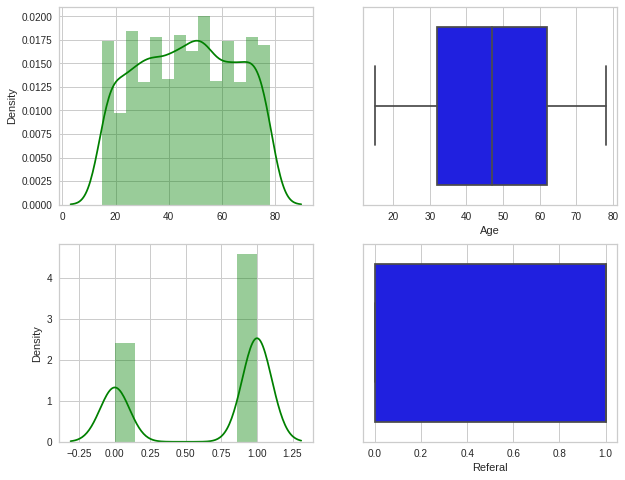

In [24]:
features = numeric
fig, ax = plt.subplots(len(features),2,figsize=(10,8))
for idx, column in enumerate(features):
    sns.distplot(
        x=df[column], 
        color='green', 
        ax=ax[idx][0])
    sns.boxplot(
        x=df[column],
        color='blue',
        ax=ax[idx][1]
        )

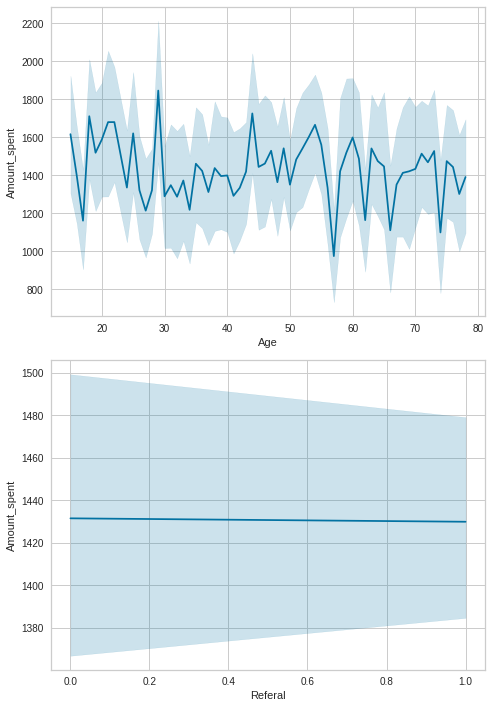

In [25]:
X_feature = ['Age',
 'Referal']
X_index = list(range(len(X_feature)))
fig, ax = plt.subplots(2,1,figsize=(7,10))
for i in X_index:
    sns.lineplot(data=df, x = X_feature[i], y = 'Amount_spent', ax=ax[i])
    plt.tight_layout()

### EDA Categorical

In [26]:
def categorical_data(title):
    plt.figure(figsize=(17,8))
    g=sns.catplot(x=title,kind='count', palette='viridis', data=df)
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + 0.02, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

In [27]:
list(df.columns)

['Gender',
 'Age',
 'Marital_status',
 'State_names',
 'Segment',
 'Employees_status',
 'Payment_method',
 'Referal',
 'Amount_spent']

<Figure size 1224x576 with 0 Axes>

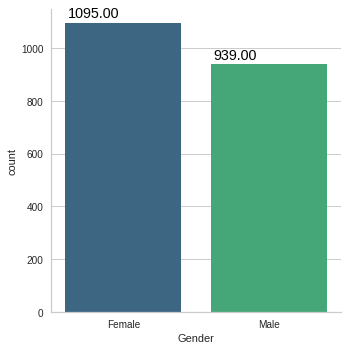

In [28]:
categorical_data('Gender')

<Figure size 1224x576 with 0 Axes>

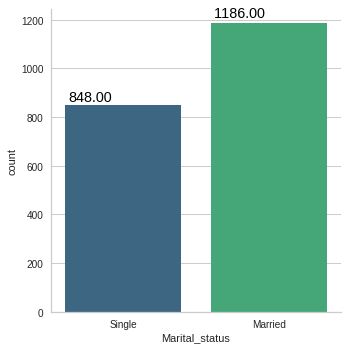

In [29]:
categorical_data('Marital_status')

<Figure size 1224x576 with 0 Axes>

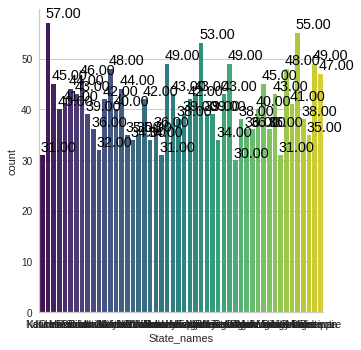

In [30]:
categorical_data('State_names')

# Feature Selection

**Calculate VIF score for each feature**

In [31]:
# define feature and target
feature_x = df[numeric]
target_Y = df[['Amount_spent']]

In [32]:
feature_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      2034 non-null   float64
 1   Referal  2034 non-null   float64
dtypes: float64(2)
memory usage: 112.2 KB


In [33]:
# Calculate VIF score for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_x)

vif_df = pd.DataFrame([vif(X.values, i)
            for i in range(X.shape[1])],
            index = X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,Age,1.000111
2,Referal,1.000111


**Correlation analysis to drop redundant feature if VIF > 4**

<function matplotlib.pyplot.show(*args, **kw)>

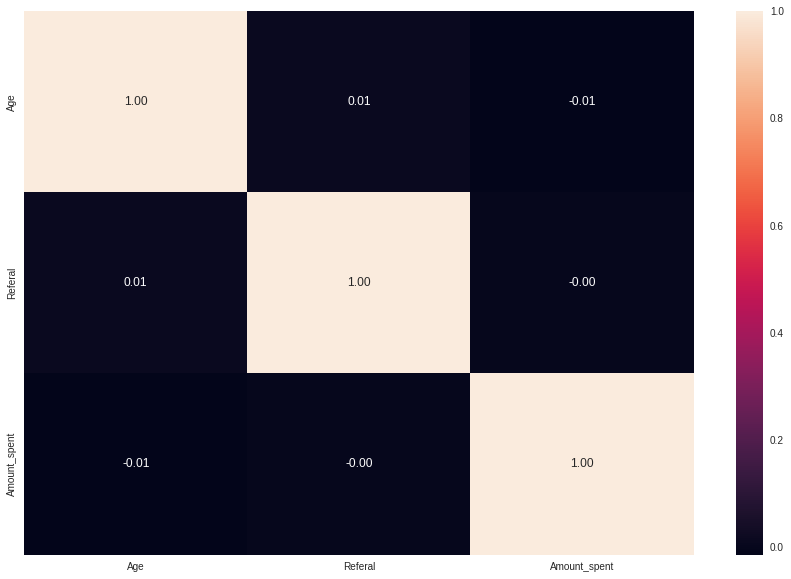

In [34]:
# heatmap correlation

data = pd.concat([feature_x, target_Y], axis=1)
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show


1. Hubungan antar variabel x dengan harus cari yang < 0,7 ( 0 , 0,6 atau bahkan bisa minus)
2. Korelasi jangan dimutlakin
3. jika hubungan korelasi antar variable x > 0,7 maka pilih salah satu dengan cara :
    a. Hubungan masing-masing variable x tersebut dengan sumbu y cari yang paling besar 

**Drop Multicollinear Features**

In [35]:
# menyesuaikan : ['rad','nox','indus']
# df = df.drop(columns = ['rad','nox','indus'])
# df

## Re-Check VIF Again

In [36]:
# X = add_constant(feature_x)

# vif_df = pd.DataFrame([vif(X.values, i)
#             for i in range(X.shape[1])],
#             index = X.columns).reset_index()
# vif_df.columns = ['feature','vif_score']
# vif_df = vif_df.loc[vif_df.feature!='const']
# vif_df


In [37]:
df

,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
5,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
6,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42
7,Male,37.0,Married,Connecticut,Basic,workers,PayPal,1.0,1149.55
8,Male,75.0,Married,Florida,Silver,Employees,Card,0.0,1046.20
9,Female,41.0,Married,Vermont,Gold,Unemployment,Card,1.0,2730.60
10,Female,56.0,Married,California,Basic,Employees,PayPal,0.0,1712.82
11,Female,63.0,Married,Colorado,Basic,workers,Other,1.0,154.31


In [38]:
df.shape

(2034, 9)

# Split Dataset

In [39]:
from sklearn.model_selection import train_test_split
# ini untuk menghindari Data Leakage

# define feature and target
#feature = df[numeric] # untuk numerical variable kolom saja

feature = df.drop(columns = 'Amount_spent') #untuk including categorical
target = df[['Amount_spent']]

# split pre-train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [40]:
feature_medv_pretrain = X_train #ini untuk cross validasi dan training data

In [41]:
feature_medv_test = X_test #ini untuk evaluasi model

In [42]:
target_medv_pretrain = y_train

In [43]:
target_medv_test = y_test

# Feature Engineering
1. Outlier Checking and Handling
2. Missing Value Handling
3. Encoding Categorical
4. Standardize Variable


Because we discover that there is outlier in each feature and the total data is less than 10000. I decided to simply ignore the outlier in the dataset (not to drop it). But i will transform the data using log transformation in order to minimize the number of outlier data

### Outlier Checking

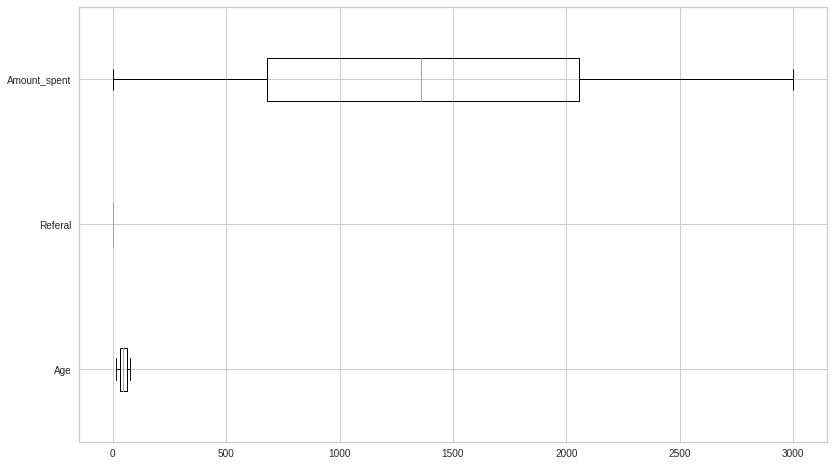

In [44]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
df.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [45]:
#Missing Value Check
df.isnull().sum()

Gender              0
Age                 0
Marital_status      0
State_names         0
Segment             0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
dtype: int64

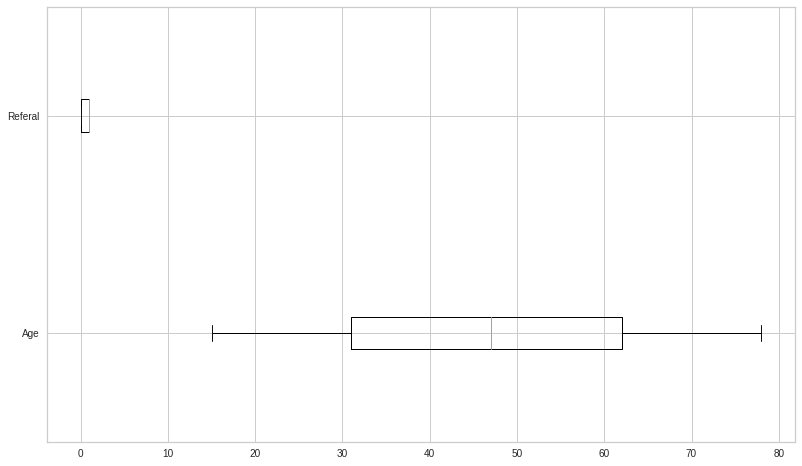

In [46]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
feature_medv_pretrain.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [47]:
#['romantic','internet','higher','nursery','activities','paid','famsup','schoolsup','guardian','reason','Fjob','Mjob','Pstatus','famsize','address','sex','school']

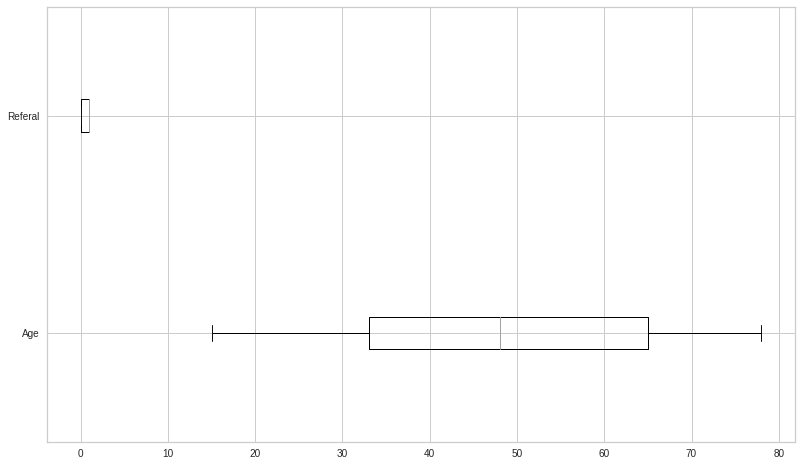

In [48]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
feature_medv_test.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [49]:
#Missing Value Handling in advance
for column in feature_medv_pretrain.columns:
    print(f"============= {column} =================")
    display(feature_medv_pretrain[column].value_counts())
    print()

============= Gender =================


Female    877
Male      750
Name: Gender, dtype: int64


============= Age =================


16.0    35
71.0    34
30.0    34
55.0    33
51.0    33
50.0    32
42.0    32
75.0    32
63.0    32
54.0    32
62.0    31
34.0    31
47.0    30
56.0    29
32.0    29
43.0    29
26.0    29
64.0    29
48.0    29
78.0    28
20.0    28
41.0    28
49.0    27
70.0    27
25.0    27
28.0    27
77.0    27
53.0    27
24.0    27
35.0    26
39.0    26
15.0    26
31.0    26
68.0    26
18.0    26
17.0    26
22.0    26
72.0    25
60.0    25
45.0    25
37.0    24
67.0    24
46.0    24
36.0    23
61.0    23
40.0    23
73.0    23
52.0    23
33.0    23
44.0    23
19.0    23
76.0    22
57.0    21
65.0    21
21.0    21
66.0    20
59.0    20
58.0    20
38.0    19
27.0    19
69.0    13
29.0    12
74.0    12
Name: Age, dtype: int64


============= Marital_status =================


Married    939
Single     688
Name: Marital_status, dtype: int64


============= State_names =================


Illinois          47
Georgia           45
Massachusetts     44
West Virginia     44
Arizona           41
Delaware          41
New Jersey        40
Minnesota         39
New Mexico        39
Vermont           39
Arkansas          38
Maine             37
Kentucky          36
Hawaii            36
Florida           36
Maryland          35
Pennsylvania      35
California        35
Washington        34
New York          34
Missouri          34
Texas             34
Colorado          33
Michigan          31
Montana           31
Nevada            31
Rhode Island      31
New Hampshire     30
Idaho             30
Wisconsin         30
Louisiana         29
Wyoming           29
South Dakota      29
North Carolina    29
Nebraska          28
Connecticut       28
Kansas            28
Ohio              28
Mississippi       28
Oregon            28
Alaska            28
North Dakota      26
Utah              26
Indiana           26
Virginia          26
Iowa              26
South Carolina    25
Oklahoma     


============= Segment =================


Basic       880
Silver      311
Platinum    276
Gold        160
Name: Segment, dtype: int64


============= Employees_status =================


Employees        617
workers          523
self-employed    332
Unemployment     155
Name: Employees_status, dtype: int64


============= Payment_method =================


PayPal    751
Card      477
Other     399
Name: Payment_method, dtype: int64


============= Referal =================


1.0    1069
0.0     558
Name: Referal, dtype: int64

Because of there are no 'foreign' values in each columns, so we assume there are no missing value

## Encoding Categorical

In [50]:
#Function Frequent Encoding
def freq_encoding(df_train, df_test, col_to_count):
    
    # make a temporary copy of the original dataframes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in col_to_count:
        # make the dictionary mapping label to counts
        X_frequency_map = df_train_temp[col].value_counts().to_dict()
        
        # remap the labels to their counts
        df_train_temp[col] = df_train_temp[col].map(X_frequency_map)
        df_test_temp[col] = df_test_temp[col].map(X_frequency_map)
    
    return df_train_temp, df_test_temp

In [51]:
#label encoding
def ordinal_encoding(df_train, df_test):
    df_train = df_train.copy()
    df_test = df_test.copy()
    
  #encoding requirement menyesuaikan kolom -> yang ordinal dengan makna positif dan negatifnya itu jelas
    mapping_dictionary = {"Segment" :{"Basic" : 1 , "Silver" : 2, "Gold" : 3, "Platinum" : 4},
                         }
    
    df_train.replace(mapping_dictionary , inplace=True)
    df_test.replace(mapping_dictionary , inplace=True)
    
    return df_train, df_test

In [52]:
col_to_use = ['Payment_method','Employees_status','State_names','Gender','Marital_status']
feature_medv_pretrain,feature_medv_test = freq_encoding(feature_medv_pretrain,feature_medv_test,col_to_use)

In [53]:
feature_medv_pretrain,feature_medv_test = ordinal_encoding(feature_medv_pretrain,feature_medv_test)

In [54]:
feature_medv_pretrain.head()

,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
1998,877,67.0,688,35,1,523,477,1.0
2090,750,33.0,939,35,1,617,399,0.0
2169,877,60.0,939,31,4,617,751,1.0
944,750,42.0,688,23,4,617,477,1.0
1666,877,48.0,939,28,1,617,751,0.0


In [55]:
feature_medv_test.head()

,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
782,877,61.0,939,34,1,523,751,1.0
132,877,49.0,939,28,1,617,751,1.0
1474,750,37.0,939,28,2,332,751,1.0
1879,750,48.0,939,31,1,155,751,0.0
973,750,42.0,688,26,4,617,751,1.0


# Standardize Variable (Feature Scalling -> Transform)

# Notes
### 1. Jika terdapat outlier dan missing value maka lakukan concat (gabung data test dan train) sebelum standar scaller, tapi train dan test hasil splitting itu sama untuk digunakan di missing value dan outlier handling
### 2. lalu sebelum dilakukan standar scaller maka dilakukan split dahulu dengan train_test_split -> hasilnya akan dipakai ke standar scaller dan ke Modelling

In [56]:
#Standar Scaller : std = 1, mean = 0 -> kasus regresi, klasifikasi
#Normalization : change the value in range 0 to 1 without change the 'value' by using the ratio -> kasus clustering, image processing
# Using Standar Scaller for Regression Case -> Needed for Normal Distribution / Gaussian Distribution
#link L : https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [57]:
feature_medv_test.describe()

,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,818.024570,48.147420,840.326781,32.334152,1.931204,488.670762,591.412776,0.651106
std,63.416555,18.010612,122.750132,6.032456,1.159745,152.459248,155.739667,0.477207
min,750.000000,15.000000,688.000000,22.000000,1.000000,155.000000,399.000000,0.000000
25%,750.000000,33.000000,688.000000,28.000000,1.000000,332.000000,477.000000,0.000000
50%,877.000000,48.000000,939.000000,31.000000,1.000000,523.000000,477.000000,1.000000
75%,877.000000,65.000000,939.000000,36.000000,3.000000,617.000000,751.000000,1.000000
max,877.000000,78.000000,939.000000,47.000000,4.000000,617.000000,751.000000,1.000000


In [58]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(feature_medv_pretrain.select_dtypes(include=numerics).columns)
feature_medv_pretrain = feature_medv_pretrain[numerical_vars]
feature_medv_pretrain

,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
1998,877,67.0,688,35,1,523,477,1.0
2090,750,33.0,939,35,1,617,399,0.0
2169,877,60.0,939,31,4,617,751,1.0
944,750,42.0,688,23,4,617,477,1.0
1666,877,48.0,939,28,1,617,751,0.0
892,750,78.0,688,39,1,523,751,0.0
2334,750,62.0,939,26,2,523,751,1.0
2319,750,24.0,688,30,1,617,477,1.0
327,877,17.0,939,36,1,617,477,0.0
1965,877,63.0,688,29,1,332,399,1.0


In [59]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(feature_medv_test.select_dtypes(include=numerics).columns)
feature_medv_test = feature_medv_test[numerical_vars]
feature_medv_test

,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
782,877,61.0,939,34,1,523,751,1.0
132,877,49.0,939,28,1,617,751,1.0
1474,750,37.0,939,28,2,332,751,1.0
1879,750,48.0,939,31,1,155,751,0.0
973,750,42.0,688,26,4,617,751,1.0
1106,750,27.0,939,25,4,523,477,0.0
754,750,66.0,688,28,1,523,751,1.0
1701,877,39.0,939,36,4,155,751,1.0
1465,877,54.0,939,41,1,523,751,1.0
345,750,65.0,939,37,1,332,477,1.0


In [60]:
from sklearn.preprocessing import StandardScaler
# ini untuk menghindari Data Leakage dan supaya normal distributed
scaler = StandardScaler() 
scaled_Xtrain = scaler.fit_transform(feature_medv_pretrain) #feature_medv_pretrain ini dari train (menyesuaikan)
scaled_Xtest = scaler.transform(feature_medv_test) #ini dari test (menyesuaikan) feature_medv_test

In [61]:
#Scalling Xtrain
scaled_Xtrain = pd.DataFrame(scaled_Xtrain)
scaled_Xtrain = scaled_Xtrain.reset_index()

#Scalling Xtest
scaled_Xtest = pd.DataFrame(scaled_Xtest)
scaled_Xtest = scaled_Xtest.reset_index()

In [62]:
feature_medv_pretrain = scaled_Xtrain
feature_medv_pretrain = feature_medv_pretrain.drop(['index'],axis=1)  
feature_medv_pretrain 

,0,1,2,3,4,5,6,7
0,0.924764,1.118236,-1.168257,0.216393,-0.784356,0.257496,-0.684096,0.722484
1,-1.081357,-0.744076,0.855976,0.216393,-0.784356,0.888056,-1.181174,-1.384114
2,0.924764,0.734818,0.855976,-0.427836,1.839662,0.888056,1.062054,0.722484
3,-1.081357,-0.251111,-1.168257,-1.716295,1.839662,0.888056,-0.684096,0.722484
4,0.924764,0.077532,0.855976,-0.911009,-0.784356,0.888056,1.062054,-1.384114
5,-1.081357,1.720748,-1.168257,0.860622,-0.784356,0.257496,1.062054,-1.384114
6,-1.081357,0.844366,0.855976,-1.233123,0.090317,0.257496,1.062054,0.722484
7,-1.081357,-1.237041,-1.168257,-0.588894,-0.784356,0.888056,-0.684096,0.722484
8,0.924764,-1.620459,0.855976,0.377450,-0.784356,0.888056,-0.684096,-1.384114
9,0.924764,0.899140,-1.168257,-0.749951,-0.784356,-1.023747,-1.181174,0.722484


In [63]:
feature_medv_test = scaled_Xtest
feature_medv_test = feature_medv_test.drop(['index'],axis=1) 
feature_medv_test

,0,1,2,3,4,5,6,7
0,0.924764,0.789592,0.855976,0.055336,-0.784356,0.257496,1.062054,0.722484
1,0.924764,0.132306,0.855976,-0.911009,-0.784356,0.888056,1.062054,0.722484
2,-1.081357,-0.524981,0.855976,-0.911009,0.090317,-1.023747,1.062054,0.722484
3,-1.081357,0.077532,0.855976,-0.427836,-0.784356,-2.211078,1.062054,-1.384114
4,-1.081357,-0.251111,-1.168257,-1.233123,1.839662,0.888056,1.062054,0.722484
5,-1.081357,-1.072720,0.855976,-1.394181,1.839662,0.257496,-0.684096,-1.384114
6,-1.081357,1.063462,-1.168257,-0.911009,-0.784356,0.257496,1.062054,0.722484
7,0.924764,-0.415433,0.855976,0.377450,1.839662,-2.211078,1.062054,0.722484
8,0.924764,0.406175,0.855976,1.182737,-0.784356,0.257496,1.062054,0.722484
9,-1.081357,1.008688,0.855976,0.538508,-0.784356,-1.023747,-0.684096,0.722484


# 3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10])

## KOMEN-KOMEN Interpretasi BELUM DIEDIT

In [64]:
# https://scikit-learn.org/stable/modules/cross_validation.html

### Split Data Train For Training and Cross Validation

In [65]:
# split pre-train into train and validation (80:20)
feature_medv_train, feature_medv_validation, target_medv_train, target_medv_validation = train_test_split(feature_medv_pretrain, target_medv_pretrain, test_size=0.2, random_state=42)

## a. Ridge Regression

In [66]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training) ini siswa lagi belajar
ridge_reg_pointzeroone.fit(X_medv_train, y_medv_train)
ridge_reg_pointone.fit(X_medv_train, y_medv_train)
ridge_reg_one.fit(X_medv_train, y_medv_train)
ridge_reg_ten.fit(X_medv_train, y_medv_train)


Ridge(alpha=10, random_state=42)

## b. LASSO

In [67]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model : ini siswa lagi belajar
lasso_reg_pointzeroone.fit(X_medv_train, y_medv_train)
lasso_reg_pointone.fit(X_medv_train, y_medv_train)
lasso_reg_one.fit(X_medv_train, y_medv_train)
lasso_reg_ten.fit(X_medv_train, y_medv_train)


Lasso(alpha=10, random_state=42)

# 4. Choose the best lambda from the validation set

## a. Use RMSE as metric

### Ridge Regression

In [101]:
from sklearn.metrics import mean_squared_error
# siswanya lagi kuis
X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
ridge_models = [ridge_reg_pointzeroone,
                ridge_reg_pointone,
                ridge_reg_one,
                ridge_reg_ten]

for model, alpha in zip(ridge_models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 883.0132967565379
RMSE of Ridge regression model with alpha = 0.1 is 883.0131026680315
RMSE of Ridge regression model with alpha = 1.0 is 883.0111635035017
RMSE of Ridge regression model with alpha = 10 is 882.9919424407422


Best alpha for Ridge Regression (the smallest RSME) is ridge_reg_ten (alpha=10)

### LASSO

In [102]:
lasso_models = [lasso_reg_pointzeroone,
                lasso_reg_pointone,
                lasso_reg_one,
                lasso_reg_ten]

for model, alpha in zip(lasso_models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 883.0111444221733
RMSE of Lasso regression model with alpha = 0.1 is 882.9916244863948
RMSE of Lasso regression model with alpha = 1.0 is 882.8007780027704
RMSE of Lasso regression model with alpha = 10 is 881.448869089741


Best alpha for LASSO (the smallest RSME) is lasso_reg_one (alpha=1)

## b. Interpret a sample of the coefficients of the best model

### Ridge Regression

In [103]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,1435.233881
1,0,10.159932
2,1,2.393493
3,2,4.533055
4,3,-17.826494
5,4,-2.453004
6,5,8.854461
7,6,-9.849283
8,7,-24.503739


### Baik ridge maupun lasso cari untuk coefficient yang paling besar (+ besar) (Kecuali intercept) berarti itu fitur (feature) yang paling berpengaruh ke sumbu Y

Interpretation (some samples):


### LASSO

In [104]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,1435.252194
1,0,9.243824
2,1,1.526865
3,2,3.599031
4,3,-17.042834
5,4,-1.454596
6,5,8.061728
7,6,-8.981905
8,7,-23.748879


# 5. Evaluate the Best Models on the Test Data (+ Interpretation)

## Diagnostic Study
### UTS dan UAS

### Ridge

In [72]:
from sklearn.metrics import r2_score

y_predict_train_r2ridge = ridge_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train_r2ridge)))

R-squared for training data is 0.0017193095845599027


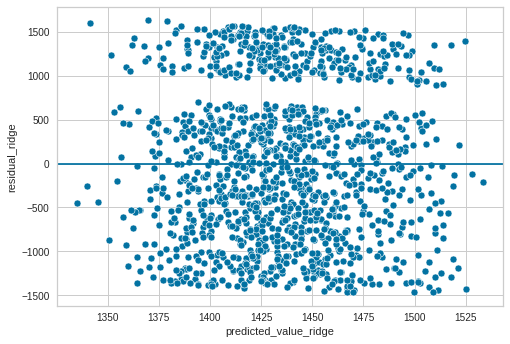

In [73]:
# calculate residuals
residual_r2ridge = y_medv_train - y_predict_train_r2ridge

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid_ridge = pd.DataFrame({
    'predicted_value_ridge': y_predict_train_r2ridge,
    'residual_ridge': residual_r2ridge
})

# residual plot
sns.scatterplot(data=df_resid_ridge, x="predicted_value_ridge", y="residual_ridge")
plt.axhline(0)
plt.show()

### Lasso

In [74]:
from sklearn.metrics import r2_score

y_predict_train_r2lasso = lasso_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train_r2lasso)))

R-squared for training data is 0.0017096705882090335


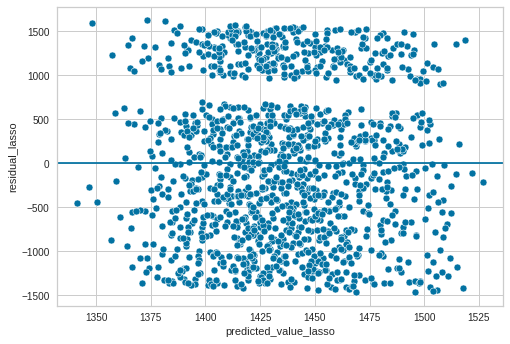

In [75]:
# calculate residuals
residual_r2lasso = y_medv_train - y_predict_train_r2lasso

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid_lasso = pd.DataFrame({
    'predicted_value_lasso': y_predict_train_r2lasso,
    'residual_lasso': residual_r2lasso
})

# residual plot
sns.scatterplot(data=df_resid_lasso, x="predicted_value_lasso", y="residual_lasso")
plt.axhline(0)
plt.show()

## Prepare for Evaluation

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [77]:
# RIDGE

# prepare prediction result on train data
y_predict_train_ridge = ridge_best.predict(X_medv_train)

# prepare prediction result on test data
X_medv_test = feature_medv_test.to_numpy()
y_predict_test_ridge = ridge_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

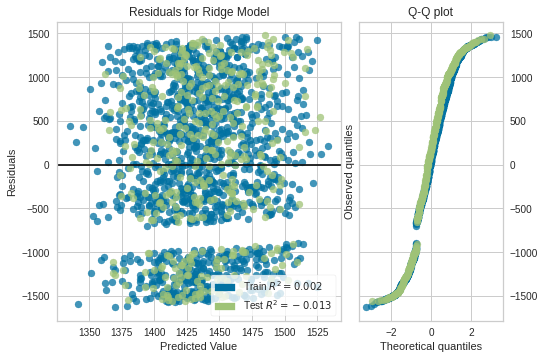

In [78]:
linear_visualize = ResidualsPlot(ridge_best,hist=False,qqplot=True)
linear_visualize.fit(X_medv_train, y_medv_train)
linear_visualize.score(X_medv_test, y_medv_test)
linear_visualize.show();

Assumptions to check via residual plot:

- Linear relationship dilihat dari Q-Q plot jika semakin linear maka pemodelannya dan proses feature selection dan engineeringnya sudah Baik
- Constant variance sudah baik karena pada residual rentang sebaran datanya itu ada di range yang berdekatan yaitu pada -10 hingga 10 untuk sumbu residualnya dan predicted value nya itu ada di rentang 0 s.d 40
- Independent residual OK (secara pattern tidak terlalu acak)

In [79]:
# LASSO

# prepare prediction result on train data
y_predict_train_lasso = lasso_best.predict(X_medv_train)

# prepare prediction result on test data
#X_medv_test = feature_medv_test.to_numpy()
y_predict_test_lasso = lasso_best.predict(X_medv_test)

# ground truth target
#y_medv_test = target_medv_test.to_numpy()
#y_medv_test = y_medv_test.reshape(len(y_medv_test),)

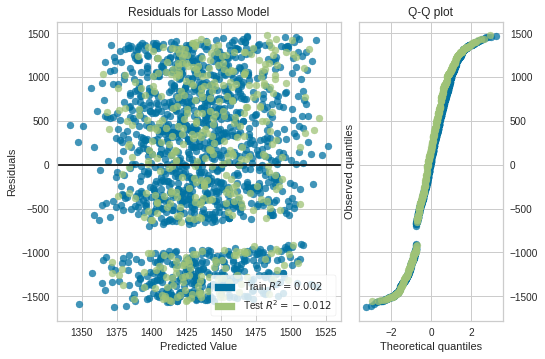

In [80]:
linear_visualize = ResidualsPlot(lasso_best,hist=False,qqplot=True)
linear_visualize.fit(X_medv_train, y_medv_train)
linear_visualize.score(X_medv_test, y_medv_test)
linear_visualize.show();

Assumptions to check via residual plot:

- Linear relationship dilihat dari Q-Q plot jika semakin linear maka pemodelannya dan proses feature selection dan engineeringnya sudah Baik

## Model yang paling bagus di Regresi :
1. MAE -> harus kecil < 20% -> MAE itu performa machine learning (Nilai MAE / Maks)
2. RMSE -> harus kecil <20% -> RMSE itu seberapa eror machine learning melakukan prediksi (Nilai RMSE / (Maks)
3. R^2 -> tentatif, linear model (harus tinggi -> mendekati 100% atau dari 0 < x < 1). Kalau bukan linear model maka R^2 kecil no problem
4. Mape -> seberapa tepat dia menghasilkan prediksi, diliat dari hasil predict nya
5. Q-Q Plot harus linear (45 derajat)
6. Coefficient : makin + (makin besar) maka indikasi kuat dia pengaruh ke target, makin minus maka dia tidak begitu berpengaruh ke target (prediksi)

In [81]:
df.describe()

,Age,Referal,Amount_spent
count,2034.000000,2034.000000,2034.000000
mean,46.897247,0.655851,1430.370492
std,18.218701,0.475207,884.733030
min,15.000000,0.000000,2.090000
25%,32.000000,0.000000,678.192500
50%,47.000000,1.000000,1358.310000
75%,62.000000,1.000000,2056.622500
max,78.000000,1.000000,2999.980000


## a. MAE

In [109]:
# MAE RIDGE

print('MAE Ridge for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train_ridge)))
print('MAE Ridge for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test_ridge)))

MAE Ridge for training data is 747.9139564549439
MAE Ridge for testing data is 793.9204370417691


In [110]:
a = 747/2999.980000 *100
print("Train MAE Ridge %",a)
b =793.9204370417691/2999.980000 *100
print("Test MAE Ridge %",b)

Train MAE Ridge % 24.900166001106676
Test MAE Ridge % 26.464190995998944


In [111]:
# MAE LASSO

print('MAE Lasso for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train_lasso)))
print('MAE Lasso for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test_lasso)))

MAE Lasso for training data is 747.926750101222
MAE Lasso for testing data is 793.6944611277792


In [112]:
a = 747.926750101222/2999.980000 *100
print("Train MAE Lasso%",a)
b = 793.6944611277792/2999.980000 *100
print("Test MAE Lasso %",b)

Train MAE Lasso% 24.931057877093245
Test MAE Lasso % 26.45665841531541


## b. MAPE

In [86]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [87]:
#MAPE RIDGE

print('MAPE Ridge for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train_ridge)))
print('MAPE Ridge for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test_ridge)))

MAPE Ridge for training data is 382.4146122665313
MAPE Ridge for testing data is 430.4300609635075


In [88]:
y_predict_train_ridge.mean()

1435.6479554189086

In [89]:
y_predict_test_ridge.mean()

1439.4683688900775

In [90]:
a = 382.4146122665313/2999.980000 *100
print("Train MAPE Ridge %",a)
b = 430.4300609635075/2999.980000 *100
print("Test MAPE Ridge %",b)

Train MAPE Ridge % 12.747238723809204
Test MAPE Ridge % 14.347764350545923


In [91]:
y_predict_train_ridge

array([1395.58221682, 1449.60165405, 1423.19035297, ..., 1401.04905881,
       1457.03671772, 1450.91856754])

In [92]:
y_predict_test_ridge
#hasil predict

array([1425.45304096, 1446.6896252 , 1405.6607958 , 1441.74156441,
       1415.51935519, 1488.83446025, 1413.77706055, 1388.53202256,
       1404.43771781, 1402.83572153, 1460.19195614, 1452.3566476 ,
       1453.82401967, 1499.58998733, 1467.51280501, 1458.13806894,
       1388.86479824, 1458.0424737 , 1420.50667934, 1484.32184724,
       1423.30130181, 1436.91930381, 1425.86038485, 1428.85425806,
       1455.94263758, 1443.32822148, 1430.21140963, 1436.57315786,
       1444.40447094, 1396.78187433, 1455.82689025, 1448.62230526,
       1392.09310043, 1420.57409524, 1389.16399707, 1496.720855  ,
       1421.60786426, 1482.24817935, 1428.24741849, 1456.75550782,
       1409.03268018, 1471.29041394, 1500.7284858 , 1413.48147767,
       1490.39318225, 1418.60078145, 1457.88621252, 1452.51844594,
       1496.70772266, 1414.56741169, 1482.79664759, 1481.12422639,
       1424.12832555, 1376.15027858, 1406.51854897, 1466.57573619,
       1421.42146788, 1413.10435833, 1415.37933902, 1494.42333

In [93]:
#MAPE LASSO

print('MAPE Lasso for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train_lasso)))
print('MAPE Lasso for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test_lasso)))

MAPE Lasso for training data is 382.5376809248715
MAPE Lasso for testing data is 430.11629919652387


In [94]:
a = 382.5376809248715/2999.980000 *100
print("Train MAPE Lasso %",a)
b = 430.11629919652387/2999.980000 *100
print("Test MAPE Lasso %",b)

Train MAPE Lasso % 12.751341039769315
Test MAPE Lasso % 14.337305555254499


## c. RMSE

In [95]:
# RMSE RIDGE

print('RMSE Ridge for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train_ridge))))
print('RMSE Ridge for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test_ridge))))

RMSE Ridge for training data is 876.7299020874547
RMSE Ridge for testing data is 913.0885094740622


In [96]:
a = 876.7299020874547/2999.980000 *100
print("Train RMSE Ridge %",a)
b = 913.0885094740622/2999.980000 *100
print("Test RMSE Ridge %",b)

Train RMSE Ridge % 29.224524899747824
Test RMSE Ridge % 30.4364865590458


In [97]:
# RMSE LASSO

print('RMSE Lasso for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train_lasso))))
print('RMSE Lasso for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test_lasso))))

RMSE Lasso for training data is 876.7341347526803
RMSE Lasso for testing data is 912.8636881643878


In [98]:
a = 876.7341347526803/2999.980000 *100
print("Train RMSE Lasso %",a)
b = 912.8636881643878/2999.980000 *100
print("Test RMSE Lasso %",b)

Train RMSE Lasso % 29.224665989529274
Test RMSE Lasso % 30.42899246542936
